# Clustering Crypto

In [23]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

### Deliverable 1: Preprocessing the Data for PCA

In [2]:
# Load the crypto_data.csv dataset.
# YOUR CODE HERE
crypto_df = pd.read_csv("crypto_data.csv", index_col=0)
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [3]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 42 to PUNK
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         1252 non-null   object 
 1   Algorithm        1252 non-null   object 
 2   IsTrading        1252 non-null   bool   
 3   ProofType        1252 non-null   object 
 4   TotalCoinsMined  744 non-null    float64
 5   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(4)
memory usage: 59.9+ KB


In [4]:
# Keep all the cryptocurrencies that are being traded.
# YOUR CODE HERE
crypto_df = crypto_df[ crypto_df["IsTrading"]==True]
crypto_df.shape

(1144, 6)

In [5]:
# drop IsTrading since now all values are True
crypto_df.drop(columns=['IsTrading'], inplace=True)
crypto_df.head(20)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [6]:
# Keep all the cryptocurrencies that have a working algorithm.
# Directions in the online module said "remove rows that have at least one null value."
# I took this to mean that a working algorithm means that the TotalCoinsMined is not null.
# YOUR CODE HERE
crypto_df.dropna(axis=0, inplace=True)
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         685 non-null    object 
 1   Algorithm        685 non-null    object 
 2   ProofType        685 non-null    object 
 3   TotalCoinsMined  685 non-null    float64
 4   TotalCoinSupply  685 non-null    object 
dtypes: float64(1), object(4)
memory usage: 32.1+ KB


In [7]:
crypto_df["Algorithm"].value_counts().head(10)

Scrypt         227
X11            101
SHA-256         69
X13             24
CryptoNight     22
Quark           20
PoS             19
Equihash        18
NeoScrypt       13
Ethash          13
Name: Algorithm, dtype: int64

In [8]:
# Keep the rows where coins are mined.
# Remove where total mined > 0 
# YOUR CODE HERE
crypto_df = crypto_df[crypto_df["TotalCoinsMined"]>0]

In [9]:
# Create a new DataFrame that holds only the cryptocurrencies names.
# YOUR CODE HERE
crypto_names = crypto_df['CoinName'].to_frame()

In [10]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
# YOUR CODE HERE
crypto_df.drop(columns=['CoinName'], inplace=True)


In [11]:
crypto_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000
ZEC,Equihash,PoW,7.383056e+06,21000000


In [12]:
# Use get_dummies() to create variables for text features.
# YOUR CODE HERE
X = pd.get_dummies(crypto_df, columns=['Algorithm','ProofType'])
X.head(20)

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEC,7.383056e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Standardize the data with StandardScaler().
# YOUR CODE HERE
X_scaled = StandardScaler().fit_transform(X)

In [14]:
X_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [15]:
X_scaled = pd.DataFrame(X_scaled, columns = X.columns, index=X.index)
X_scaled

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,-0.117108,-0.152870,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
404,-0.093970,-0.145009,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
1337,0.524946,4.489424,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
BTC,-0.116715,-0.152560,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
ETH,-0.114747,-0.152870,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,-0.073251,-0.123317,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
GAP,-0.116781,-0.149176,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
BDX,-0.095613,-0.132179,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
ZEN,-0.116948,-0.152560,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396


### Deliverable 2: Reducing Data Dimensions Using PCA

In [16]:
# Using PCA to reduce dimension to three principal components.
# YOUR CODE HERE

# Initialize the PCA model
pca = PCA(n_components=3)
pca.fit(X_scaled)
print(pca.explained_variance_ratio_)

[0.02793084 0.02134248 0.02048128]


In [17]:
X_pca = pca.transform(X_scaled)
# could also do X_pca = pca.fit_transform(X_scaled)

In [18]:
# Create a DataFrame with the three principal components.
# YOUR CODE HERE
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'], index=X_scaled.index)
df_pca.head(10)

,PC1,PC2,PC3
42,-0.334816,0.862978,-0.475315
404,-0.318163,0.862721,-0.475518
1337,2.299033,1.453944,-0.551242
BTC,-0.148637,-1.233100,0.172531
ETH,-0.151743,-1.906975,0.327973
LTC,-0.163233,-1.150098,0.009671
DASH,-0.397748,1.129584,-0.397220
XMR,-0.149310,-2.093101,0.359312
ETC,-0.150186,-1.907113,0.327974
ZEC,-0.152654,-1.879482,0.413620


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

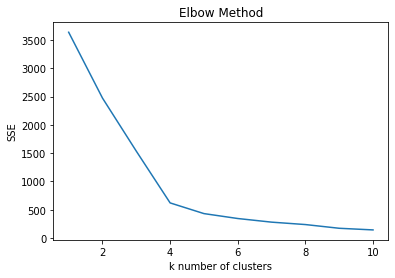

In [24]:
# Create an elbow curve to find the best value for K.
# YOUR CODE HERE
sse = {}  # dict for storing the inertia values (sse) from the KMeans model
K = range(1,11)
for k in K:
    kMeansModel = KMeans(n_clusters=k).fit(X_pca) # use pca data to build various KMeans models
    sse[k] = kMeansModel.inertia_

# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

Running K-Means with `k=4`

In [38]:
# Initialize the K-Means model.
# YOUR CODE HERE
model = KMeans(n_clusters=4, random_state=1).fit(X_pca)

# Predict clusters
# YOUR CODE HERE
y_pred = model.predict(X_pca)

In [41]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
# Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
# YOUR CODE HERE
df_pred = pd.DataFrame(y_pred, columns=['Class'], index=df_pca.index)
df_pred.head()
clustered_df = crypto_df.join(df_pred, how='inner').join(df_pca, how='inner')

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
# YOUR CODE HERE
clustered_df = clustered_df.join(crypto_names, how='inner')
clustered_df = clustered_df[['Algorithm', 'ProofType', 'TotalCoinsMined', 'TotalCoinSupply', 
                             'PC1', 'PC2', 'PC3', 'CoinName','Class']]

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC1,PC2,PC3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.334816,0.862978,-0.475315,42 Coin,1
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.318163,0.862721,-0.475518,404Coin,1
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.299033,1.453944,-0.551242,EliteCoin,1
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.148637,-1.233100,0.172531,Bitcoin,0
ETH,Ethash,PoW,1.076842e+08,0,-0.151743,-1.906975,0.327973,Ethereum,0
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.163233,-1.150098,0.009671,Litecoin,0
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.397748,1.129584,-0.397220,Dash,1
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.149310,-2.093101,0.359312,Monero,0
ETC,Ethash,PoW,1.133597e+08,210000000,-0.150186,-1.907113,0.327974,Ethereum Classic,0
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.152654,-1.879482,0.413620,ZCash,0


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [ ]:
# Creating a 3D-Scatter with the PCA data and the clusters
# YOUR CODE HERE


In [ ]:
# Create a table with tradable cryptocurrencies.
# YOUR CODE HERE

In [ ]:
# Print the total number of tradable cryptocurrencies.
# YOUR CODE HERE

In [ ]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
# YOUR CODE HERE

In [ ]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
# YOUR CODE HERE

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
# YOUR CODE HERE

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
# YOUR CODE HERE

plot_df.head(10)

In [ ]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
# YOUR CODE HERE
